In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pickle

In [6]:
print("Lets Load the datasets........\n")
try:
    df = pd.read_csv("fraudTest.csv")
except FileNotFoundError:
    raise SystemExit("File not Exist: fraudTest.csv (place it next to this script or update path)")
except Exception as e:
    raise SystemExit(f"An error occurred while reading CSV: {e}") 

Lets Load the datasets........



In [7]:
print(f"The Total Number of the Rows is {df.shape[0]} and the Total Columns is {df.shape[1]}." )

The Total Number of the Rows is 555719 and the Total Columns is 23.


In [8]:
print("The Data Types Of the all the Valuse:-\n")
df.dtypes

The Data Types Of the all the Valuse:-



Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
print("Lets Describe all the Int and Float Columns of the Datasets:-\n")
df.describe()

Lets Describe all the Int and Float Columns of the Datasets:-



,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [10]:
print("Lets see the Null value present in the Datasets:-\n")
df.isnull().sum()

Lets see the Null value present in the Datasets:-



Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
print("Let see the data type of the all the Datasets.")
df.dtypes

Let see the data type of the all the Datasets.


Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [12]:
# Drop unused columns safely
drop_cols = ["Unnamed: 0", "trans_date_trans_time", "cc_num", "first", "last", "street",
             "trans_num", "dob", "unix_time"]
existing_drop = [c for c in drop_cols if c in df.columns]  # UPDATED
df = df.drop(columns=existing_drop)

In [13]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist() 
print("Categorical columns found:", categorical_columns)

Categorical columns found: ['merchant', 'category', 'gender', 'city', 'state', 'job']


In [14]:
# Use separate LabelEncoder for each categorical column
encoders = {}  
for i in categorical_columns:
    le = LabelEncoder() 
    df[i] = df[i].astype(str) 
    df[i] = le.fit_transform(df[i]) 
    encoders[i] = le 

In [15]:
#Feture Selection
X = df.iloc[:,:-1]
y = df['is_fraud']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

In [17]:
#Feture Scaling of the all data.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)

In [18]:
#Using the Knn Model.

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)
print("Classification Report of the KNN Model:\n", classification_report(y_test, y_pred_knn))
print("The Accuracy Score of the KNN Model is:\n", accuracy_score(y_test, y_pred_knn)*100)

Classification Report of the KNN Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.67      0.37      0.47       429

    accuracy                           1.00    111144
   macro avg       0.84      0.68      0.74    111144
weighted avg       1.00      1.00      1.00    111144

The Accuracy Score of the KNN Model is:
 99.68689267976679


In [19]:
print("The Accuracy Score of the KNN Model is:\n",accuracy_score(y_test,y_pred_knn)*100)

The Accuracy Score of the KNN Model is:
 99.68689267976679


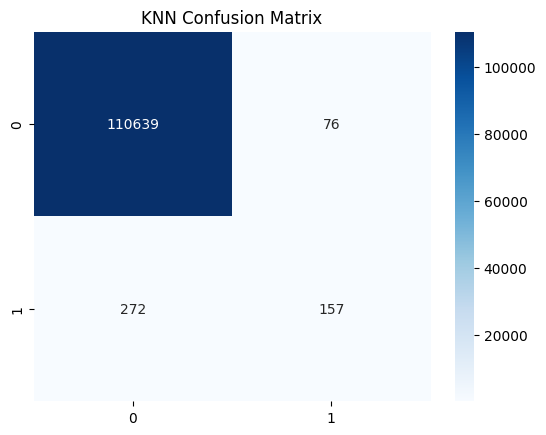

In [20]:
#Lets see the Confusion Matrix of this model Prediction

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.savefig("Diagram images/Predicted_Output_Confustion_Matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [21]:
#Using the Second Mode That is the Decision Tree

In [22]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=42)
dtree.fit(x_train, y_train)
y_tree_predict = dtree.predict(x_test)
print("Report of the Decision Tree Classifier:\n", classification_report(y_test, y_tree_predict))
print("Accuracy of the Decision Tree Classifier Model is:", accuracy_score(y_test, y_tree_predict)*100)

Report of the Decision Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.69      0.55      0.61       429

    accuracy                           1.00    111144
   macro avg       0.84      0.78      0.81    111144
weighted avg       1.00      1.00      1.00    111144

Accuracy of the Decision Tree Classifier Model is: 99.73187936370834


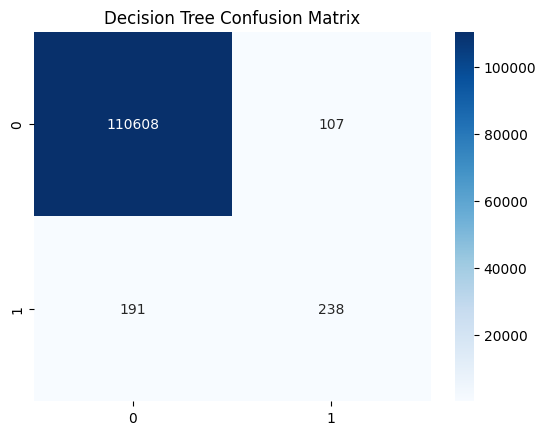

In [23]:

sns.heatmap(confusion_matrix(y_test, y_tree_predict), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.savefig("Diagram images/Confusion_Matrix_of_Decision_Tree_Classifier_Model.png", dpi=300, bbox_inches='tight')
plt.show()

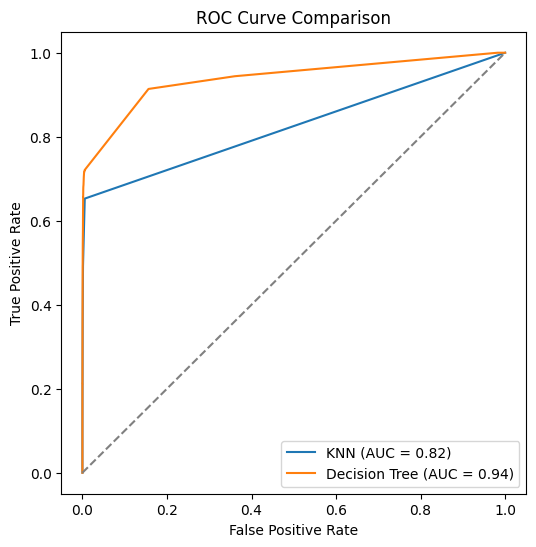

In [24]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(x_test_scaled)[:,1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, dtree.predict_proba(x_test)[:,1])

plt.figure(figsize=(6,6))
plt.plot(fpr_knn, tpr_knn, label="KNN (AUC = %0.2f)" % auc(fpr_knn, tpr_knn))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = %0.2f)" % auc(fpr_dt, tpr_dt))
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.savefig("Diagram images/ROC_Curve_Comparison.png",dpi=500,bbox_inches='tight')
plt.show()

In [33]:
#User Input

def user_input_prediction(model,scaler):
    print("Enter the Transection Details:-")

    merchant = input("Enter the merchant:")
    amt = float(input("Transaction Amount: "))
    category = input("Merchant Category (e.g., travel, health_fitness): ")
    gender = input("Gender (M/F): ")
    city_pop = int(input("City Population: "))
    lat = float(input("Latitude: "))
    long = float(input("Longitude: "))

    user_data = {
        "merchant":merchant,
        "category":category,
        "amt": amt,
        "gender":gender,
        "city_pop":city_pop,
        "lat":lat,
        "long":long,
        "merch_lat":lat + 0.01,
        "merch_long":long + 0.01
    }

    #Make the data frame of this user details. 
    input_data = pd.DataFrame([user_data])

    #Encode the Catagorical Column

    for i in categorical_columns:
        if i in input_data.columns:
            if i in encoders:
              input_data[i] = encoders[i].transform(input_data[i])
            else:
                 print(f"Warning: Encoder not found for {i}.")

    #Align With the Training Columns

    extra_cols = set(input_data.columns) - set(X.columns)
    input_data = input_data.drop(columns=extra_cols)

    missing_cols = set(X.columns) - set(input_data.columns)
    for j in missing_cols:
        input_data[j] = 0

    input_df = input_data[X.columns]

    #Scale Down the User input
    input_scaled = scaler.transform(input_df)

    #predict 

    prediction = model.predict(input_scaled)

    if prediction[0] == 1:
        print("ALERT: Fraudulent Transaction Detected!")
    else:
        print("Transaction is Genuine.")
        
# Function Calling.

print("\nUser Prediction with Decision Tree.")
user_input_prediction(dtree, scaler)


User Prediction with Decision Tree.
Enter the Transection Details:-
Transaction is Genuine.


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
model_artifacts = {
    'encoders': encoders,
    'labelencoder':le,         
    'scaler': scaler,              
    'knn_model': knn,             
    'dtree_model': dtree,         
    'feature_columns': X.columns.tolist()  
}

# Write to pickle file
with open('models/model.pkl', 'wb') as f:
    pickle.dump(model_artifacts, f)

print("✅ Models saved successfully to 'models/model.pkl'")

✅ Models saved successfully to 'models/model.pkl'
